In [25]:
from gensim.test.utils import datapath
from gensim import utils

In [26]:
corpus_path = datapath('lee_background.cor') # https://hekyll.services.adelaide.edu.au/dspace/bitstream/2440/28910/1/hdl_28910.pdf

In [27]:

for line in open(corpus_path):
  print(line)
  break

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

In [28]:
data = []
for line in open(corpus_path):
  data.append(utils.simple_preprocess(line))

In [29]:
len(data)

300

In [30]:
import gensim.models

In [31]:
model = gensim.models.Word2Vec(sentences=data, # Pass the data
                               sg=1) # 1 for skip-gram; otherwise CBOW = 0.

In [32]:
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

In [33]:
def reduce_dimensions(model, ndim=2):
    num_dimensions = ndim  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=12345)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]

    return x_vals, y_vals, labels

In [34]:
xval, yval, labels = reduce_dimensions(model)

In [35]:
xval[0]

-39.20337

In [36]:
labels[0:5]

array(['the', 'to', 'of', 'in', 'and'], dtype='<U14')

In [37]:
import matplotlib.pyplot as plt
import random
random.seed(12345)

In [38]:
indices = list(range(len(labels)))
selected_indices = random.sample(indices, 50)

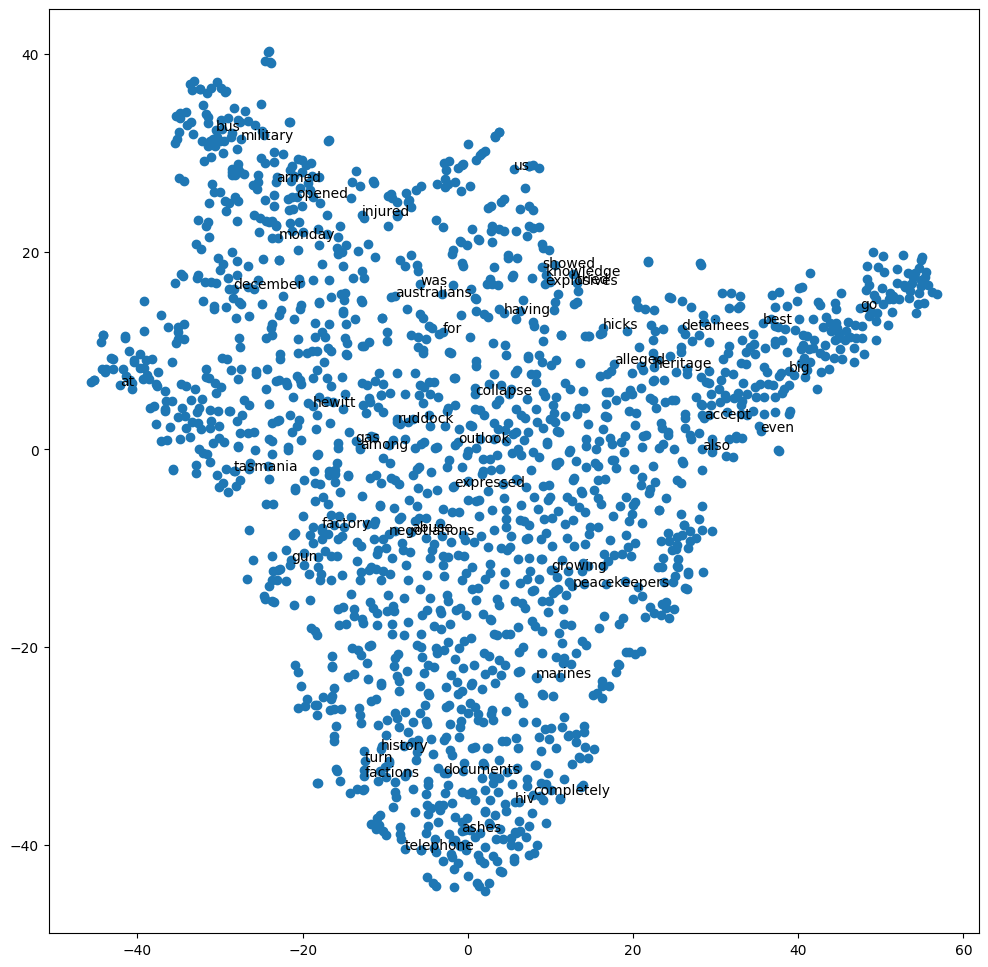

In [39]:
plt.figure(figsize=(12, 12))
plt.scatter(xval, yval)
for i in selected_indices:
  plt.annotate(labels[i], (xval[i], yval[i]))